In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização para os gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [ ]:
# Carregamento do Dataset
# Certificando de que o arquivo '202104-divvy-tripdata.csv' foi carregado no ambiente do Colab.
try:
    df = pd.read_csv('202104-divvy-tripdata.csv')
    print("Dataset carregado com sucesso!\n")
    print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
except FileNotFoundError:
    print("Erro: O arquivo '202104-divvy-tripdata.csv' não foi encontrado.")
    print("Por favor, faça o upload do arquivo para o ambiente do Google Colab.")

# Visualização inicial para garantir que tudo foi carregado corretamente
df.head()

Dataset carregado com sucesso!

O dataset possui 337230 linhas e 13 colunas.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [ ]:
# Informações gerais e tipos de dados
print("Informações Gerais do DataFrame:\n")
df.info()

Informações Gerais do DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337230 entries, 0 to 337229
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             337230 non-null  object 
 1   rideable_type       337230 non-null  object 
 2   started_at          337230 non-null  object 
 3   ended_at            337230 non-null  object 
 4   start_station_name  311174 non-null  object 
 5   start_station_id    311174 non-null  object 
 6   end_station_name    309056 non-null  object 
 7   end_station_id      309056 non-null  object 
 8   start_lat           337230 non-null  float64
 9   start_lng           337230 non-null  float64
 10  end_lat             336963 non-null  float64
 11  end_lng             336963 non-null  float64
 12  member_casual       337230 non-null  object 
dtypes: float64(4), object(9)
memory usage: 33.4+ MB


In [ ]:
# Verificação de valores ausentes
print("\nContagem de valores ausentes por coluna:\n")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Contagem de valores ausentes por coluna:

start_station_name    26056
start_station_id      26056
end_station_name      28174
end_station_id        28174
end_lat                 267
end_lng                 267
dtype: int64



Distribuição da variável alvo (member_casual):
member_casual
member    200629
casual    136601
Name: count, dtype: int64

Distribuição percentual:
member_casual
member    59.493224
casual    40.506776
Name: proportion, dtype: float64


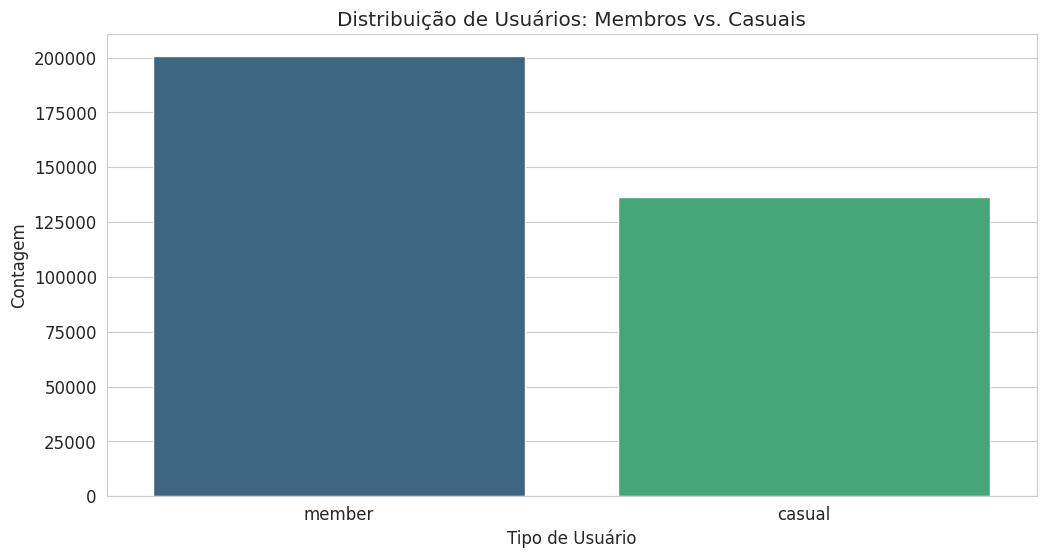

In [ ]:
# Análise da variável alvo ('member_casual')

print("\nDistribuição da variável alvo (member_casual):")
print(df['member_casual'].value_counts())
print("\nDistribuição percentual:")
print(df['member_casual'].value_counts(normalize=True) * 100)

# Visualização da distribuição
sns.countplot(
    x='member_casual',
    data=df,
    hue='member_casual',
    palette='viridis',
    legend=False
)

plt.title('Distribuição de Usuários: Membros vs. Casuais')
plt.ylabel('Contagem')
plt.xlabel('Tipo de Usuário')
plt.show()

In [ ]:
# Criando uma cópia para o pré-processamento
# É uma boa prática manter o dataframe original intacto.
df_processed = df.copy()

# Conversão de 'started_at' e 'ended_at' para datetime
df_processed['started_at'] = pd.to_datetime(df_processed['started_at'])
df_processed['ended_at'] = pd.to_datetime(df_processed['ended_at'])

# --- Engenharia de Features ---
# 1. Duração da Viagem em minutos
df_processed['trip_duration_minutes'] = (df_processed['ended_at'] - df_processed['started_at']).dt.total_seconds() / 60

# 2. Dia da semana (Segunda=0, Domingo=6)
df_processed['day_of_week'] = df_processed['started_at'].dt.dayofweek

# 3. Hora do dia
df_processed['hour_of_day'] = df_processed['started_at'].dt.hour

print("Novas features criadas: 'trip_duration_minutes', 'day_of_week', 'hour_of_day'")
df_processed[['started_at', 'ended_at', 'trip_duration_minutes', 'day_of_week', 'hour_of_day']].head()

Novas features criadas: 'trip_duration_minutes', 'day_of_week', 'hour_of_day'


,started_at,ended_at,trip_duration_minutes,day_of_week,hour_of_day
0,2021-04-12 18:25:36,2021-04-12 18:56:55,31.316667,0,18
1,2021-04-27 17:27:11,2021-04-27 18:31:29,64.300000,1,17
2,2021-04-03 12:42:45,2021-04-07 11:40:24,5697.650000,5,12
3,2021-04-17 09:17:42,2021-04-17 09:42:48,25.100000,5,9
4,2021-04-03 12:42:25,2021-04-03 14:13:42,91.283333,5,12


Estatísticas descritivas da duração da viagem:
count    336937.000000
mean         21.228902
std          40.446694
min           0.016667
25%           7.100000
50%          12.716667
75%          23.683333
max        1438.550000
Name: trip_duration_minutes, dtype: float64


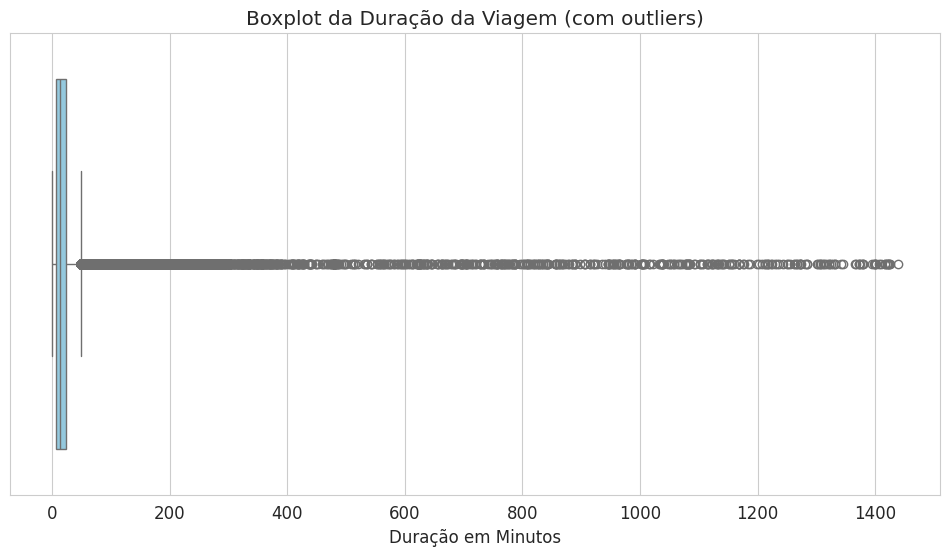

Removidas 0 viagens com duração não positiva.
Removidas 0 viagens com duração superior a 24 horas.

Novas estatísticas descritivas da duração da viagem (após limpeza):
count    336937.000000
mean         21.228902
std          40.446694
min           0.016667
25%           7.100000
50%          12.716667
75%          23.683333
max        1438.550000
Name: trip_duration_minutes, dtype: float64


In [ ]:
# Análise e tratamento de outliers em 'trip_duration_minutes'

print("Estatísticas descritivas da duração da viagem:")
print(df_processed['trip_duration_minutes'].describe())

# Visualizando outliers
sns.boxplot(x='trip_duration_minutes', data=df_processed, color='skyblue')
plt.title('Boxplot da Duração da Viagem (com outliers)')
plt.xlabel('Duração em Minutos')
plt.show()

# Tratamento de dados inconsistentes e outliers
# Remove viagens com duração negativa ou zero (erros de dados)
initial_rows = len(df_processed)
df_processed = df_processed[df_processed['trip_duration_minutes'] > 0]
print(f"Removidas {initial_rows - len(df_processed)} viagens com duração não positiva.")

# Remove viagens extremamente longas (ex: mais de 1 dia = 1440 minutos)
# Dica: Viagens muito longas são raras e podem ser bicicletas perdidas ou erros de sistema.
# Elas podem distorcer a escala e prejudicar o modelo.
initial_rows = len(df_processed)
df_processed = df_processed[df_processed['trip_duration_minutes'] < 1440]
print(f"Removidas {initial_rows - len(df_processed)} viagens com duração superior a 24 horas.")

print("\nNovas estatísticas descritivas da duração da viagem (após limpeza):")
print(df_processed['trip_duration_minutes'].describe())

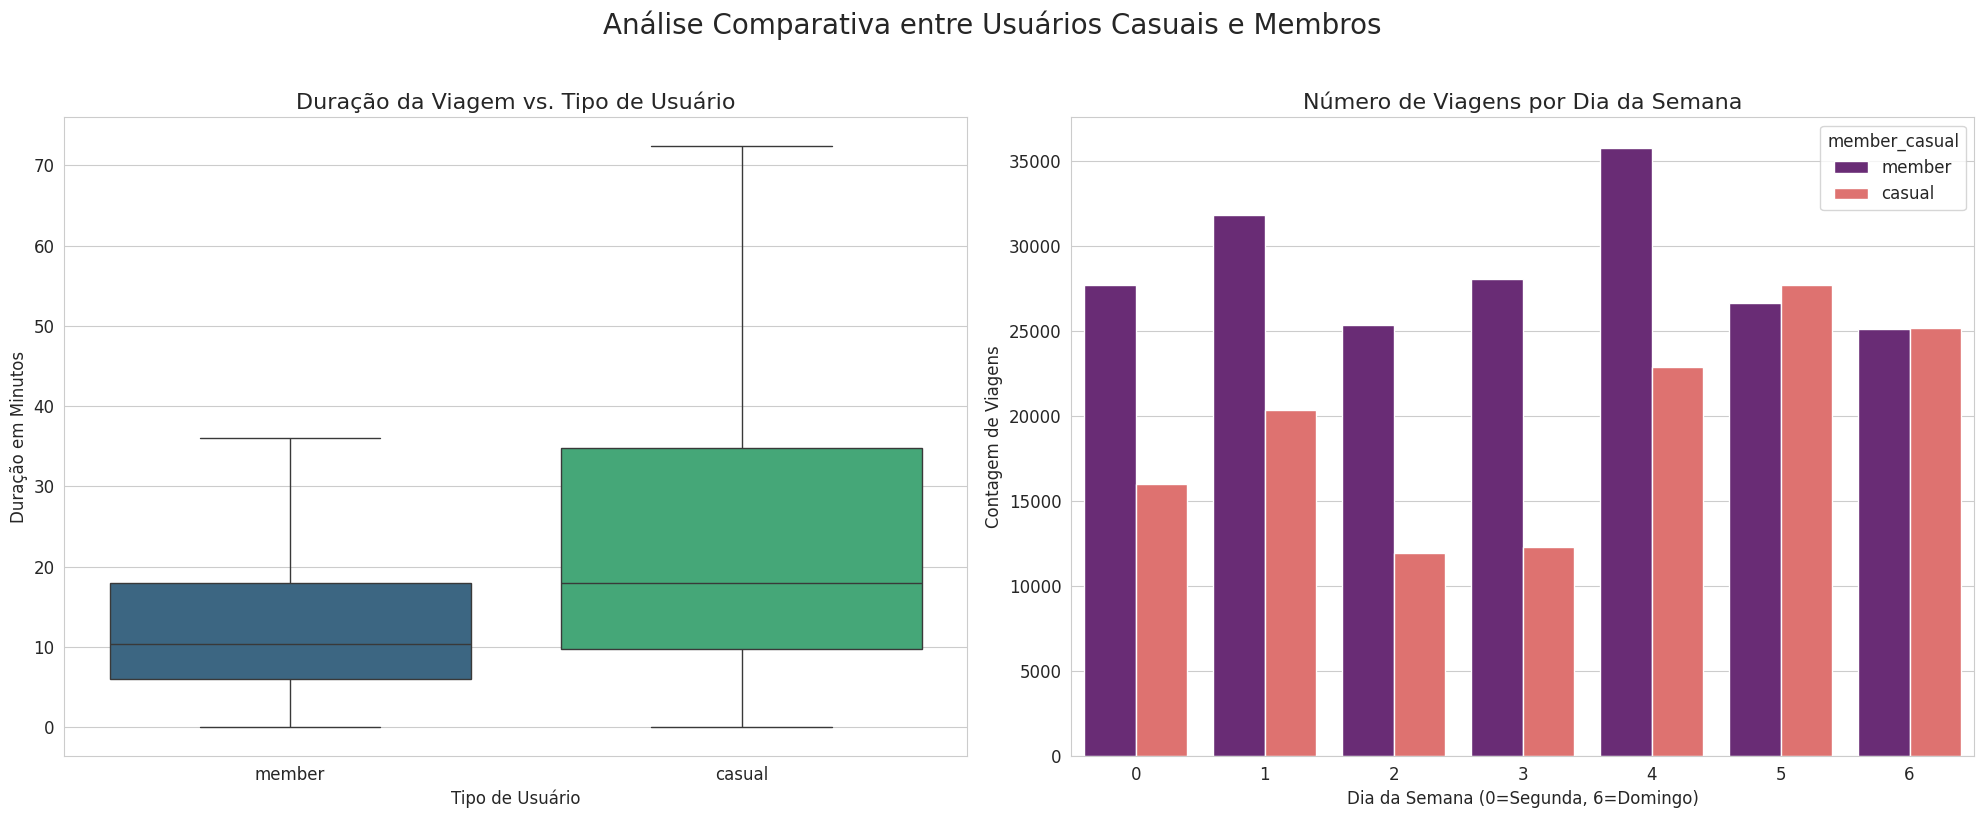

In [ ]:
# Visualizando os insights das novas features
# --- Criando uma figura com dois subplots (1 linha, 2 colunas) ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- Gráfico 1: Boxplot da Duração da Viagem (à esquerda) ---
sns.boxplot(
    x='member_casual',
    y='trip_duration_minutes',
    data=df_processed,
    hue='member_casual',
    palette='viridis',
    showfliers=False,
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Duração da Viagem vs. Tipo de Usuário', fontsize=16)
axes[0].set_ylabel('Duração em Minutos', fontsize=12)
axes[0].set_xlabel('Tipo de Usuário', fontsize=12)

# --- Gráfico 2: Contagem de Viagens por Dia da Semana (à direita) ---
sns.countplot(
    x='day_of_week',
    hue='member_casual',
    data=df_processed,
    palette='magma',
    ax=axes[1]
)
axes[1].set_title('Número de Viagens por Dia da Semana', fontsize=16)
axes[1].set_ylabel('Contagem de Viagens', fontsize=12)
axes[1].set_xlabel('Dia da Semana (0=Segunda, 6=Domingo)', fontsize=12)

# --- Finalização ---
plt.suptitle('Análise Comparativa entre Usuários Casuais e Membros', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# Seleção final de features e codificação
# Decisão: Vamos remover colunas que não usaremos para simplificar o modelo.
# Lat/Lng poderiam ser usadas para clustering, mas para um modelo inicial, vamos focar no tempo.
# ride_id é um identificador único e não tem valor preditivo.
# As colunas de estação serão removidas devido aos dados ausentes e alta cardinalidade.
features_to_drop = ['ride_id', 'started_at', 'ended_at', 'start_station_name', 'start_station_id',
                    'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng']
df_model = df_processed.drop(columns=features_to_drop)

# Codificação da variável alvo para formato numérico
df_model['member_casual'] = df_model['member_casual'].apply(lambda x: 1 if x == 'member' else 0)

# Codificação de variáveis categóricas (One-Hot Encoding)
df_model = pd.get_dummies(df_model, columns=['rideable_type', 'day_of_week'], drop_first=True)

print("DataFrame final pronto para modelagem:")
df_model.head()

DataFrame final pronto para modelagem:


,member_casual,trip_duration_minutes,hour_of_day,rideable_type_docked_bike,rideable_type_electric_bike,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,1,31.316667,18,False,False,False,False,False,False,False,False
1,0,64.300000,17,True,False,True,False,False,False,False,False
3,1,25.100000,9,False,False,False,False,False,False,True,False
4,0,91.283333,12,True,False,False,False,False,False,True,False
5,0,0.683333,18,False,False,False,False,False,False,False,True


In [ ]:
# Verificação final do dataframe do modelo
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336937 entries, 0 to 337229
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_casual                336937 non-null  int64  
 1   trip_duration_minutes        336937 non-null  float64
 2   hour_of_day                  336937 non-null  int32  
 3   rideable_type_docked_bike    336937 non-null  bool   
 4   rideable_type_electric_bike  336937 non-null  bool   
 5   day_of_week_1                336937 non-null  bool   
 6   day_of_week_2                336937 non-null  bool   
 7   day_of_week_3                336937 non-null  bool   
 8   day_of_week_4                336937 non-null  bool   
 9   day_of_week_5                336937 non-null  bool   
 10  day_of_week_6                336937 non-null  bool   
dtypes: bool(8), float64(1), int32(1), int64(1)
memory usage: 11.6 MB


In [ ]:
# Separação de Features (X) e Alvo (y)
X = df_model.drop('member_casual', axis=1)
y = df_model['member_casual']

print("Shape de X (features):", X.shape)
print("Shape de y (alvo):", y.shape)

Shape de X (features): (336937, 10)
Shape de y (alvo): (336937,)


In [ ]:
# Divisão em Dados de Treino e Teste
from sklearn.model_selection import train_test_split

# Usamos stratify=y para garantir que a proporção de 'member' e 'casual'
# seja a mesma nos conjuntos de treino e teste. Essencial para dados como os nossos.
# random_state garante que a divisão seja a mesma toda vez que rodarmos o código (reprodutibilidade).
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% dos dados para teste
    random_state=42,
    stratify=y
)

print("Tamanhos dos conjuntos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Tamanhos dos conjuntos:
X_train: (269549, 10)
X_test: (67388, 10)
y_train: (269549,)
y_test: (67388,)


In [ ]:
# Escalonamento de Features (MÉTODO CORRETO PARA EVITAR DATA LEAKAGE)
from sklearn.preprocessing import StandardScaler

# 1. Criar uma instância do scaler
scaler = StandardScaler()

# 2. "Fitar" o scaler APENAS nos dados de TREINO.
# O scaler aprende a média e o desvio padrão de cada feature a partir dos dados de treino.
scaler.fit(X_train)

# 3. Transformar (aplicar o escalonamento) em AMBOS os conjuntos, treino e teste.
# Usamos os parâmetros aprendidos no treino para transformar o teste.
# Isso simula a chegada de novos dados no mundo real.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# O resultado são arrays numpy. Vamos convertê-los de volta para DataFrames para melhor visualização (opcional).
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nFeatures escalonadas com sucesso, sem vazamento de dados.")
X_train_scaled.head()


Features escalonadas com sucesso, sem vazamento de dados.


,trip_duration_minutes,hour_of_day,rideable_type_docked_bike,rideable_type_electric_bike,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,0.878962,-2.640562,3.575788,-0.639774,-0.428162,-0.353242,-0.369009,-0.458926,-0.438537,2.386533
1,0.021312,-0.309107,-0.279659,-0.639774,-0.428162,-0.353242,-0.369009,2.179002,-0.438537,-0.419018
2,-0.386175,-1.368859,-0.279659,1.563052,-0.428162,-0.353242,-0.369009,-0.458926,2.280308,-0.419018
3,-0.296306,-0.944958,-0.279659,-0.639774,-0.428162,-0.353242,-0.369009,-0.458926,2.280308,-0.419018
4,0.149344,-0.309107,-0.279659,-0.639774,-0.428162,-0.353242,-0.369009,-0.458926,-0.438537,-0.419018


In [ ]:
# Importação dos modelos e métricas de avaliação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Dicionário para armazenar os resultados para comparação posterior
results = {}

# --- 1. Regressão Logística (Baseline) ---
print("--- Treinando Regressão Logística ---")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Casual (0)', 'Member (1)']))
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
roc_auc_lr = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
f1_lr_member = classification_report(y_test, y_pred_log_reg, output_dict=True)['1']['f1-score']
results['Regressão Logística'] = {'Accuracy': accuracy_lr, 'ROC-AUC': roc_auc_lr, 'F1-Score (Member)': f1_lr_member}

# --- 2. Random Forest ---
print("\n--- Treinando Random Forest ---")
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=['Casual (0)', 'Member (1)']))
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
f1_rf_member = classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']
results['Random Forest'] = {'Accuracy': accuracy_rf, 'ROC-AUC': roc_auc_rf, 'F1-Score (Member)': f1_rf_member}


# --- 3. XGBoost ---
print("\n--- Treinando XGBoost ---")

xgb = XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)

xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_xgb, target_names=['Casual (0)', 'Member (1)']))
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:, 1])
f1_xgb_member = classification_report(y_test, y_pred_xgb, output_dict=True)['1']['f1-score']
results['XGBoost'] = {'Accuracy': accuracy_xgb, 'ROC-AUC': roc_auc_xgb, 'F1-Score (Member)': f1_xgb_member}

--- Treinando Regressão Logística ---
Relatório de Classificação:
              precision    recall  f1-score   support

  Casual (0)       0.80      0.37      0.50     27272
  Member (1)       0.69      0.94      0.79     40116

    accuracy                           0.71     67388
   macro avg       0.74      0.65      0.65     67388
weighted avg       0.73      0.71      0.67     67388


--- Treinando Random Forest ---
Relatório de Classificação:
              precision    recall  f1-score   support

  Casual (0)       0.56      0.54      0.55     27272
  Member (1)       0.69      0.72      0.70     40116

    accuracy                           0.64     67388
   macro avg       0.63      0.63      0.63     67388
weighted avg       0.64      0.64      0.64     67388


--- Treinando XGBoost ---
Relatório de Classificação:
              precision    recall  f1-score   support

  Casual (0)       0.76      0.42      0.54     27272
  Member (1)       0.70      0.91      0.79     40116



In [ ]:
# Tabela Comparativa de Resultados
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Modelo'})
results_df = results_df.sort_values(by='ROC-AUC', ascending=False)

print("--- Tabela Comparativa de Desempenho dos Modelos ---")
print(results_df)

--- Tabela Comparativa de Desempenho dos Modelos ---
                Modelo  Accuracy   ROC-AUC  F1-Score (Member)
2              XGBoost  0.709355  0.752292           0.788136
0  Regressão Logística  0.706238  0.738182           0.791573
1        Random Forest  0.642295  0.687221           0.704186


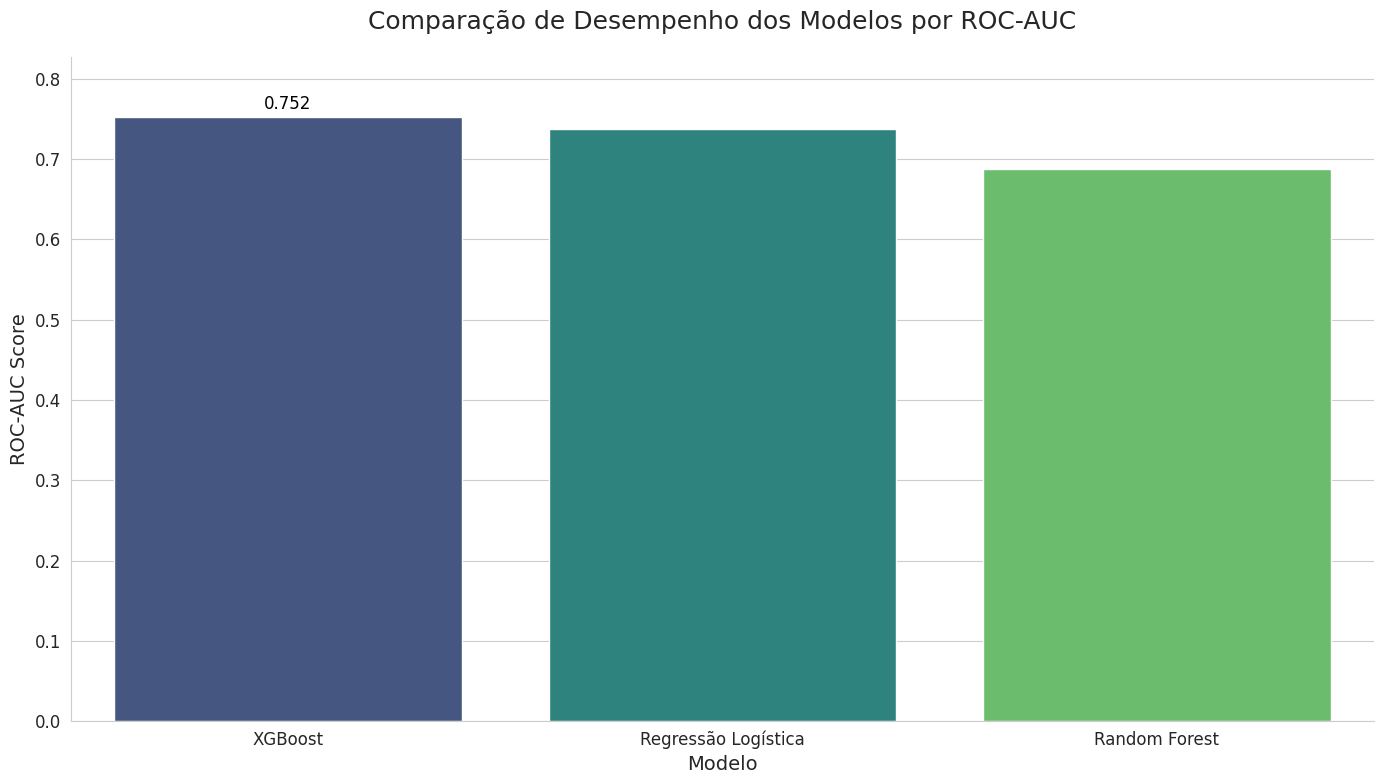

In [ ]:
# 1. Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(14, 8))

# 2. Criar o gráfico de barras no eixo 'ax'
barplot = sns.barplot(
    x='Modelo',
    y='ROC-AUC',
    data=results_df,
    hue='Modelo',
    palette='viridis',
    legend=False,
    ax=ax
)

# 3. Adicionar os rótulos de dados (o detalhe principal da sua referência)
# A função ax.bar_label é a maneira mais moderna e limpa de fazer isso.
# Ela itera sobre as barras e adiciona o rótulo de forma inteligente.
ax.bar_label(
    barplot.containers[0], # Pega o container das barras
    fmt='%.3f',            # Formata o número para 3 casas decimais
    fontsize=12,
    color='black',
    padding=3              # Um pequeno espaço entre a barra e o texto
)

# 4. Configurar os detalhes estéticos e informativos
ax.set_title('Comparação de Desempenho dos Modelos por ROC-AUC', fontsize=18, pad=20)
ax.set_xlabel('Modelo', fontsize=14)
ax.set_ylabel('ROC-AUC Score', fontsize=14)

# Ajusta o limite do eixo Y para dar espaço para os rótulos no topo
ax.set_ylim(0, results_df['ROC-AUC'].max() * 1.1)

# Remove as bordas desnecessárias para um visual mais limpo
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 5. Exibir o gráfico finalizado
plt.tight_layout() # Ajusta o layout para garantir que nada seja cortado
plt.show()


--- Análise Aprofundada do Melhor Modelo: XGBoost ---


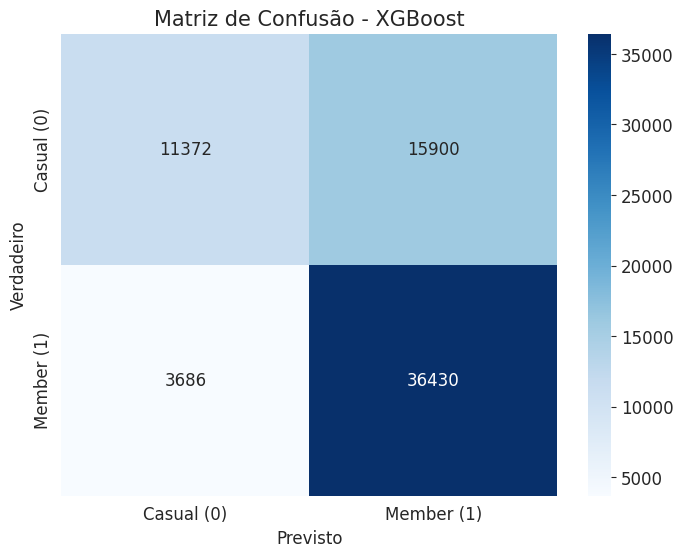

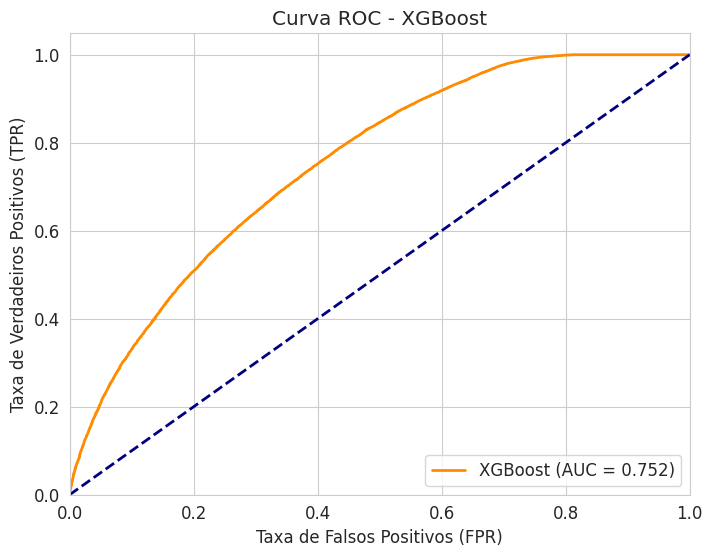

In [ ]:
# Análise aprofundada do melhor modelo
print("\n--- Análise Aprofundada do Melhor Modelo: XGBoost ---")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Casual (0)', 'Member (1)'],
            yticklabels=['Casual (0)', 'Member (1)'])
plt.title('Matriz de Confusão - XGBoost', fontsize=15)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsto', fontsize=12)
plt.show()
print("\n\n")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - XGBoost')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Definindo o espaço de hiperparâmetros para o XGBoost
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

# Criando o modelo base XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)

# Configurando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("--- Iniciando o Ajuste de Hiperparâmetros (pode levar alguns minutos) ---")
random_search.fit(X_train_scaled, y_train)

print("\nMelhores hiperparâmetros encontrados:")
print(random_search.best_params_)

# Avaliando o modelo otimizado no conjunto de teste
best_xgb_model = random_search.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test_scaled)

print("\n--- Relatório de Classificação do Modelo XGBoost Otimizado ---")
print(classification_report(y_test, y_pred_xgb_tuned, target_names=['Casual (0)', 'Member (1)']))

# Armazenando os novos resultados
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
roc_auc_xgb_tuned = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test_scaled)[:, 1])
f1_xgb_tuned_member = classification_report(y_test, y_pred_xgb_tuned, output_dict=True)['1']['f1-score']
results['XGBoost Otimizado'] = {'Accuracy': accuracy_xgb_tuned, 'ROC-AUC': roc_auc_xgb_tuned, 'F1-Score (Member)': f1_xgb_tuned_member}

print("\n--- Tabela Comparativa Atualizada ---")
results_df_tuned = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Modelo'})
print(results_df_tuned.sort_values(by='ROC-AUC', ascending=False))

--- Iniciando o Ajuste de Hiperparâmetros (pode levar alguns minutos) ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Melhores hiperparâmetros encontrados:
{'colsample_bytree': np.float64(0.8288016796836732), 'gamma': np.float64(0.3842770071531545), 'learning_rate': np.float64(0.023081131526330123), 'max_depth': 6, 'n_estimators': 319, 'subsample': np.float64(0.7879778055963772)}

--- Relatório de Classificação do Modelo XGBoost Otimizado ---
              precision    recall  f1-score   support

  Casual (0)       0.77      0.41      0.53     27272
  Member (1)       0.69      0.92      0.79     40116

    accuracy                           0.71     67388
   macro avg       0.73      0.66      0.66     67388
weighted avg       0.72      0.71      0.69     67388


--- Tabela Comparativa Atualizada ---
                Modelo  Accuracy   ROC-AUC  F1-Score (Member)
3    XGBoost Otimizado  0.709889  0.753892           0.789898
2              XGBoost  0.709355  0.752292  

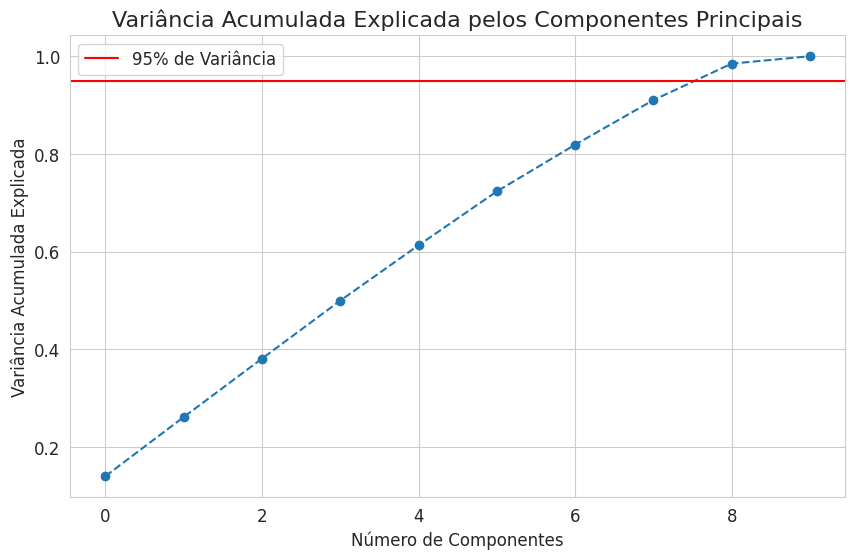

In [ ]:
# Análise da Variância Explicada pelo PCA
from sklearn.decomposition import PCA

# 1. Aplicar o PCA para visualizar a variância
# Fitamos o PCA em todos os componentes possíveis para entender a contribuição de cada um
pca_explorer = PCA()
pca_explorer.fit(X_train_scaled)

# 2. Plotar o gráfico da variância acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_explorer.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Variância Acumulada Explicada pelos Componentes Principais', fontsize=16)
plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Variância Acumulada Explicada', fontsize=12)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% de Variância')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Aplicando o PCA e Retreinando o Melhor Modelo

# 1. Escolha do número de componentes (vamos supor que 7 explicaram 95% da variância)
N_COMPONENTS = 7 # Substitua pelo número que você observou no seu gráfico
pca = PCA(n_components=N_COMPONENTS)

# 2. Fit e transform nos dados de TREINO (sem data leakage)
X_train_pca = pca.fit_transform(X_train_scaled)

# 3. Apenas transform nos dados de TESTE
X_test_pca = pca.transform(X_test_scaled)

print(f"Shape original dos dados de treino: {X_train_scaled.shape}")
print(f"Shape dos dados de treino após PCA: {X_train_pca.shape}")

# 4. Treinar nosso MELHOR modelo (XGBoost Otimizado) com os dados reduzidos
print("\n--- Treinando o modelo XGBoost Otimizado com dados do PCA ---")
# Usamos os mesmos parâmetros otimizados que encontramos anteriormente
xgb_pca_model = random_search.best_estimator_
xgb_pca_model.fit(X_train_pca, y_train)

# 5. Avaliar o modelo
y_pred_xgb_pca = xgb_pca_model.predict(X_test_pca)

print("\n--- Relatório de Classificação do Modelo com PCA ---")
print(classification_report(y_test, y_pred_xgb_pca, target_names=['Casual (0)', 'Member (1)']))

# Armazenar os resultados finais para a discussão
accuracy_xgb_pca = accuracy_score(y_test, y_pred_xgb_pca)
roc_auc_xgb_pca = roc_auc_score(y_test, xgb_pca_model.predict_proba(X_test_pca)[:, 1])
f1_xgb_pca_member = classification_report(y_test, y_pred_xgb_pca, output_dict=True)['1']['f1-score']
results['XGBoost Otimizado + PCA'] = {'Accuracy': accuracy_xgb_pca, 'ROC-AUC': roc_auc_xgb_pca, 'F1-Score (Member)': f1_xgb_pca_member}

print("\n--- Tabela Comparativa Final ---")
final_results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Modelo'})
print(final_results_df.sort_values(by='ROC-AUC', ascending=False))

Shape original dos dados de treino: (269549, 10)
Shape dos dados de treino após PCA: (269549, 7)

--- Treinando o modelo XGBoost Otimizado com dados do PCA ---

--- Relatório de Classificação do Modelo com PCA ---
              precision    recall  f1-score   support

  Casual (0)       0.78      0.39      0.52     27272
  Member (1)       0.69      0.92      0.79     40116

    accuracy                           0.71     67388
   macro avg       0.73      0.66      0.66     67388
weighted avg       0.73      0.71      0.68     67388


--- Tabela Comparativa Final ---
                    Modelo  Accuracy   ROC-AUC  F1-Score (Member)
3        XGBoost Otimizado  0.709889  0.753892           0.789898
2                  XGBoost  0.709355  0.752292           0.788136
4  XGBoost Otimizado + PCA  0.708895  0.751257           0.790817
0      Regressão Logística  0.706238  0.738182           0.791573
1            Random Forest  0.642295  0.687221           0.704186
